Importujemy potrzebne pakiety / moduły

In [1]:
import pandas as pd
import numpy as np

Wczytujemy plik z powiatami

In [2]:
powiaty = pd.read_excel(io = "Powiaty.xls")
print(powiaty.head())
print(powiaty.shape)

                   Powiaty   Id      X1_s  ...      X4_d      X5_d      X6_d
0               chodzieski  251  0.638029  ...  0.282360  0.536464  0.064824
1  czarnkowsko-trzcianecki  252  0.635018  ...  0.295556  0.512332  0.115621
2             gnieźnieński  253  0.571948  ...  0.308769  0.468553  0.246254
3                gostyński  254  0.707542  ...  0.362074  0.470871  0.077338
4                grodziski  255  0.645110  ...  0.412271  0.417134  0.141414

[5 rows x 8 columns]
(35, 8)


+ x1s - udział procentowy zatrudnionych w sektorze prywatnym w liczbie zatrudnionych ogółem;
+ x2s - przeciętne miesięczne wynagrodzenie (brutto);
+ x3d - stopa bezrobocia rejestrowanego;
+ x4d - udział procentowy bezrobotnych do 25 roku życia w ogólnej liczbie bezrobotnych;
+ x5d - udział procentowy długotrwale bezrobotnych w ogólnej liczbie bezrobotnych;
+ x6d - udział procentowy bezrobotnych bez stażu lub ze stażem do 1 roku w ogólnej liczbie bezrobotnych;

In [3]:
powiaty.describe()

,Id,X1_s,X2_s,X3_d,X4_d,X5_d,X6_d
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,268.000000,0.612881,1829.547429,0.180771,0.333395,0.477209,0.146212
std,10.246951,0.104079,245.764738,0.048488,0.039804,0.059129,0.087077
min,251.000000,0.215894,1356.200000,0.069000,0.242877,0.348723,0.064824
25%,259.500000,0.575835,1666.365000,0.142500,0.306919,0.436512,0.088203
50%,268.000000,0.617031,1795.930000,0.182000,0.336082,0.470871,0.124622
75%,276.500000,0.651491,1948.235000,0.222000,0.366205,0.518288,0.160100
max,285.000000,0.813250,2512.130000,0.279000,0.412271,0.602793,0.493064


Tworzymy dwie zmienne, będące wynikiem unitaryzacji zerowanej. Zastosujemy następujące wzory:


*   Stymulanty

$$
z_{ik}= \frac{x_{ik} - \min(x_{ik})}{\max(x_{ik}) - \min(x_{ik})} 
$$
*   Destymulanty

$$
z_{ik}= \frac{\max(x_{ik})-x_{ik}}{\max(x_{ik}) - \min(x_{ik})} 
$$




In [4]:
powiaty["z1"] = (powiaty["X1_s"] - np.min(powiaty["X1_s"])) / (np.max(powiaty["X1_s"]) - np.min(powiaty["X1_s"]))
powiaty["z1"].describe()

count    35.000000
mean      0.664574
std       0.174233
min       0.000000
25%       0.602556
50%       0.671521
75%       0.729207
max       1.000000
Name: z1, dtype: float64

In [5]:
powiaty["z4"] = (np.max(powiaty["X4_d"]) - powiaty["X4_d"] ) / (np.max(powiaty["X4_d"]) - np.min(powiaty["X4_d"]))
powiaty["z4"].describe()

count    35.000000
mean      0.465635
std       0.234979
min       0.000000
25%       0.271943
50%       0.449770
75%       0.621935
max       1.000000
Name: z4, dtype: float64

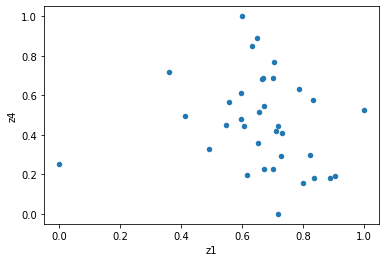

In [6]:
## zależnosć między odsetkiem zatrudnionych w sektorze prywatnym do 
## udziału osób młodych (do 25 roku życia) do wszystkich bezrobotnych
powiaty.plot.scatter(x = "z1", y = "z4") 

In [7]:
## stymulanty
powiaty["z1"] = (powiaty["X1_s"] - np.min(powiaty["X1_s"])) / (np.max(powiaty["X1_s"]) - np.min(powiaty["X1_s"]))
powiaty["z2"] = (powiaty["X2_s"] - np.min(powiaty["X2_s"])) / (np.max(powiaty["X2_s"]) - np.min(powiaty["X2_s"]))
## destymulanty
powiaty["z3"] = (np.max(powiaty["X3_d"]) - powiaty["X3_d"] ) / (np.max(powiaty["X3_d"]) - np.min(powiaty["X3_d"]))
powiaty["z4"] = (np.max(powiaty["X4_d"]) - powiaty["X4_d"] ) / (np.max(powiaty["X4_d"]) - np.min(powiaty["X4_d"]))
powiaty["z5"] = (np.max(powiaty["X5_d"]) - powiaty["X5_d"] ) / (np.max(powiaty["X5_d"]) - np.min(powiaty["X5_d"]))
powiaty["z6"] = (np.max(powiaty["X6_d"]) - powiaty["X6_d"] ) / (np.max(powiaty["X6_d"]) - np.min(powiaty["X6_d"]))

powiaty[["z1", "z2", "z3", "z4", "z5", "z6"]].describe()
powiaty.loc[:, 'z1':'z6'].describe()

,z1,z4,z2,z3,z5,z6
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.664574,0.465635,0.409495,0.467755,0.494289,0.809949
std,0.174233,0.234979,0.212612,0.230894,0.232728,0.203337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602556,0.271943,0.268325,0.271429,0.332606,0.777517
50%,0.671521,0.449770,0.380412,0.461905,0.519235,0.860363
75%,0.729207,0.621935,0.512172,0.650000,0.654467,0.945407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Stworzymy miernik syntetyczny

$$
q_i = \frac{\sum_{k=1}^{K} z_{ik}}{K} \times 100\%
$$

Jak policzyć?

+ `zbior.mean(axis = 0)` -- liczmy średnią po wierszach dla każdej kolumny (dostajemy wektor o długości równej liczbie kolumn)

+ `zbior.mean(axis = 1)` -- liczmy średnią po kolumnach dla każdego wiersza (dostajemy wektor o długości równej liczbie wierszy)

In [8]:
powiaty["miernik"] = powiaty.loc[:, 'z1':'z6'].mean(axis = 1) 
powiaty.sort_values(by = "miernik",   ascending=False, inplace=True)
powiaty[["Powiaty", "miernik"]]

,Powiaty,miernik
34,Poznań,0.867575
20,poznański,0.796835
33,Leszno,0.691035
31,Kalisz,0.643147
23,szamotulski,0.629432
28,wolsztyński,0.625491
12,leszczyński,0.625481
17,ostrzeszowski,0.618537
10,kościański,0.612419
24,średzki,0.601480


Jednym ze sposobów weryfikacji jest badanie korelacji z zmiennymi użytymi w analizie (tymi X, a nie Z)


In [20]:
powiaty.loc[:, ['X1_s', 'X6_d', "miernik"]].corr()

,X1_s,X6_d,miernik
X1_s,1.000000,-0.013765,0.424942
X6_d,-0.013765,1.000000,-0.334188
miernik,0.424942,-0.334188,1.000000


## Wyliczamy miernik syntetyczny wzorcowy

Zgodnie ze wzorem

$$
q_i^{(2)} = \sqrt{\frac{\sum_{i=1}^K(z_{ik}-z_{0k})^2}{K}}
$$

In [45]:
## obliczamy miernik syntetyczny (bez pierwiastka)
## aby policzyć potęgę trzeba użyć funkcji pow(x, 2)
powiaty["miernik_wzorcowy"] = (pow(powiaty.z1 - np.max(powiaty.z1),2) + \
                               pow(powiaty.z2 - np.max(powiaty.z2),2) + \
                               pow(powiaty.z3 - np.max(powiaty.z3),2) + \
                               pow(powiaty.z4 - np.max(powiaty.z4),2) + \
                               pow(powiaty.z5 - np.max(powiaty.z5),2) + \
                               pow(powiaty.z6 - np.max(powiaty.z6),2)) / 6

## wyznaczamy pierwiastek (np.sqrt, np.pow(x, .5))
powiaty["miernik_wzorcowy"] = np.sqrt(powiaty["miernik_wzorcowy"])

powiaty[["Powiaty", "miernik", "miernik_wzorcowy"]].sort_values(by = "miernik_wzorcowy",   ascending=True).head()

,Powiaty,miernik,miernik_wzorcowy
34,Poznań,0.867575,0.182401
20,poznański,0.796835,0.270167
33,Leszno,0.691035,0.333668
31,Kalisz,0.643147,0.395829
23,szamotulski,0.629432,0.427757


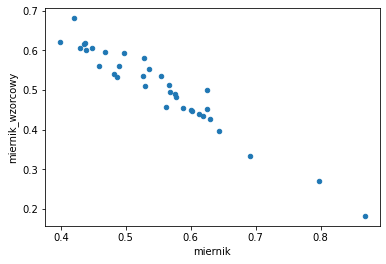

In [46]:
powiaty.plot.scatter(x = "miernik", y = "miernik_wzorcowy")

Dodajemy ranking w postaci kolejnych numerów gdzie 1 = najlepszy powiat, a 35 -- najgorszy powiat.

Możemy tego dokonać używając funkcji `rank()` z modułu `pandas`. Ta funkcja ma następujące argumenty:

+ `method` -- jak radzi sobie z wartościami, które są takie same: `average` (domyślna), `min`, `max`, `first`, `dense`
+ `ascending` = `True`

In [51]:
powiaty["miernik_ranking"] = powiaty.miernik.rank(ascending=False).astype(int)
powiaty["miernik_wzorcowy_ranking"] = powiaty.miernik_wzorcowy.rank(ascending=True).astype(int)
powiaty[["Powiaty", "miernik", "miernik_ranking", "miernik_wzorcowy_ranking"]].head()

,Powiaty,miernik,miernik_ranking,miernik_wzorcowy_ranking
34,Poznań,0.867575,1,1
20,poznański,0.796835,2,2
33,Leszno,0.691035,3,3
31,Kalisz,0.643147,4,4
23,szamotulski,0.629432,5,5


In [52]:
powiaty[["miernik_ranking", "miernik_wzorcowy_ranking"]].corr()

,miernik_ranking,miernik_wzorcowy_ranking
miernik_ranking,1.000000,0.956863
miernik_wzorcowy_ranking,0.956863,1.000000


In [57]:
powiaty["zgoda"] = powiaty.miernik_ranking == powiaty.miernik_wzorcowy_ranking
powiaty.value_counts("zgoda")

zgoda
False    25
True     10
dtype: int64

Wyznaczamy wskaźnik rozwoju Hellwiga

$$
\hat{q}_i = 1 - \frac{q_i^{(2)}}{q_0}
$$



In [61]:
powiaty["miernik_hellwig"] = 1 - powiaty.miernik_wzorcowy / (np.mean(powiaty.miernik_wzorcowy) + 2*np.std(powiaty.miernik_wzorcowy))
powiaty["miernik_hellwig_ranking"] = powiaty.miernik_hellwig.rank(ascending=False).astype(int) 
powiaty[["Powiaty", "miernik_ranking", "miernik_wzorcowy_ranking", "miernik_hellwig_ranking"]].head()

,Powiaty,miernik_ranking,miernik_wzorcowy_ranking,miernik_hellwig_ranking
34,Poznań,1,1,1
20,poznański,2,2,2
33,Leszno,3,3,3
31,Kalisz,4,4,4
23,szamotulski,5,5,5


In [66]:
powiaty[["Powiaty", "miernik", "miernik_wzorcowy", "miernik_hellwig"]].head()

,Powiaty,miernik,miernik_wzorcowy,miernik_hellwig
34,Poznań,0.867575,0.182401,0.742837
20,poznański,0.796835,0.270167,0.619097
33,Leszno,0.691035,0.333668,0.529568
31,Kalisz,0.643147,0.395829,0.441929
23,szamotulski,0.629432,0.427757,0.396914


In [65]:
powiaty[["miernik_ranking", "miernik_wzorcowy_ranking", "miernik_hellwig_ranking"]].corr()

,miernik_ranking,miernik_wzorcowy_ranking,miernik_hellwig_ranking
miernik_ranking,1.000000,0.956863,0.956863
miernik_wzorcowy_ranking,0.956863,1.000000,1.000000
miernik_hellwig_ranking,0.956863,1.000000,1.000000


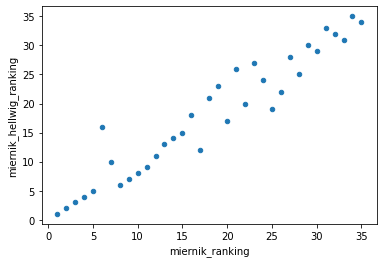

In [67]:
powiaty.plot.scatter(x = "miernik_ranking", y = "miernik_hellwig_ranking")